# Select Dataset 
* Anuran Calls (MFCCs): https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs
* Classification Task (X: MFCCs; Y: Family)

## Instructions
1) Take 10 moderately sized subsamples your dataset and create a correlation plot for each subsample
2) If your problem is a classification problem visually check if the target variable is imbalanced 
3) Take 10 moderately sized subsamples and create a pairplot of the feature variable in relation to the target variable
4) Create a clustermap with seaborn to explore the relationships between variables.
5) Perform SVM modelling and check the performance of your model, improve the performance of your model using grdisearch

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load Data

In [5]:
# Load datset
data = pd.read_csv("Frogs_MFCCs.csv")

data.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [6]:
data.tail(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60
7194,1.0,-0.508833,-0.324106,0.062068,0.078211,0.397188,0.094596,-0.117672,0.058874,0.076180,...,0.061455,0.072983,-0.003980,0.031560,-0.029355,-0.087910,Hylidae,Scinax,ScinaxRuber,60


# Subsample and Create Correlation Plots

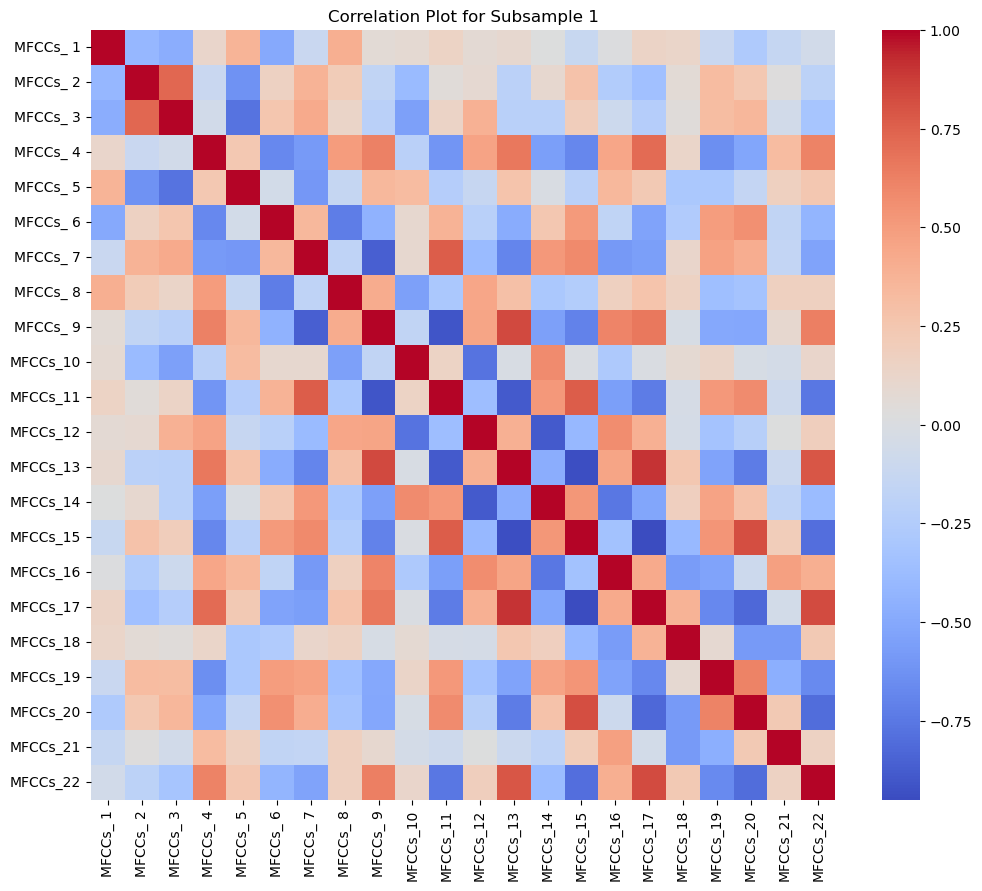

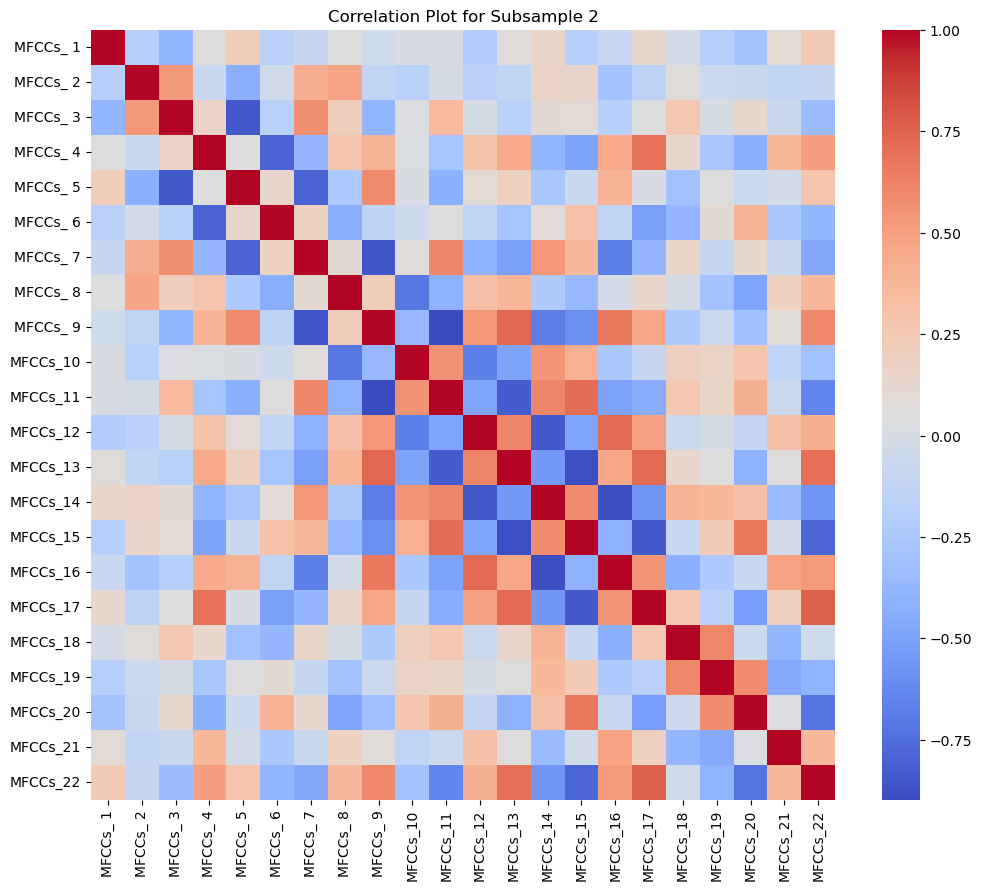

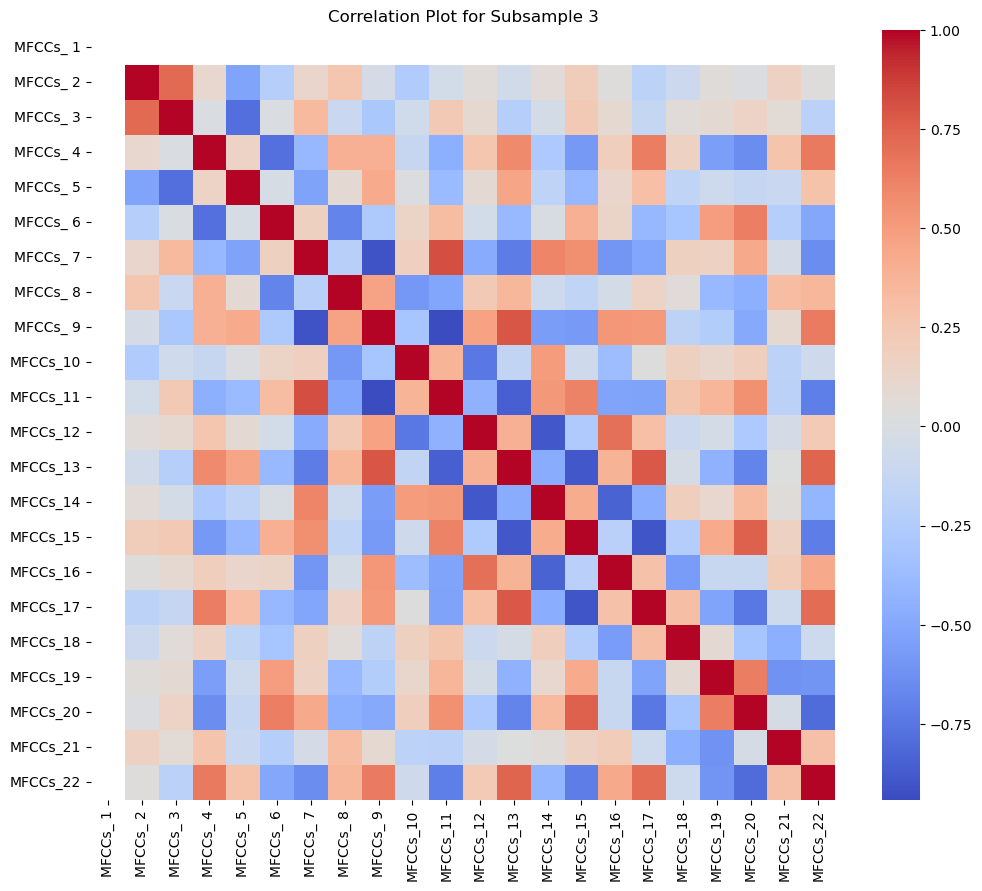

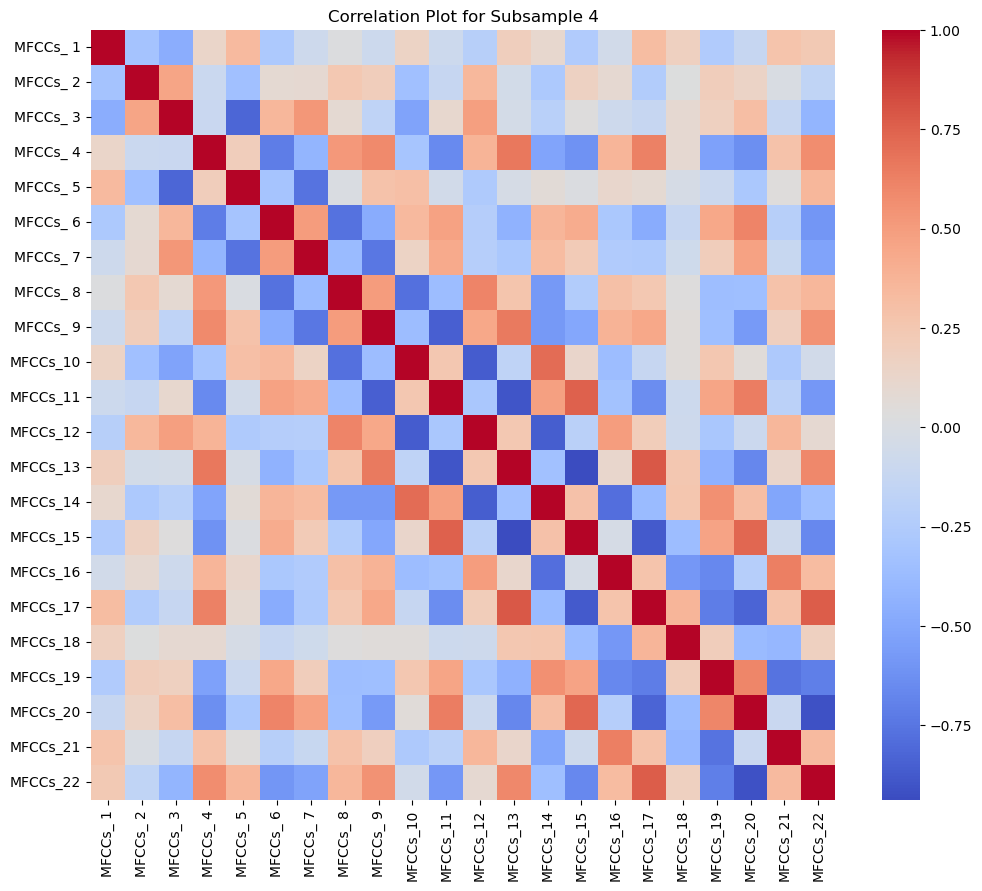

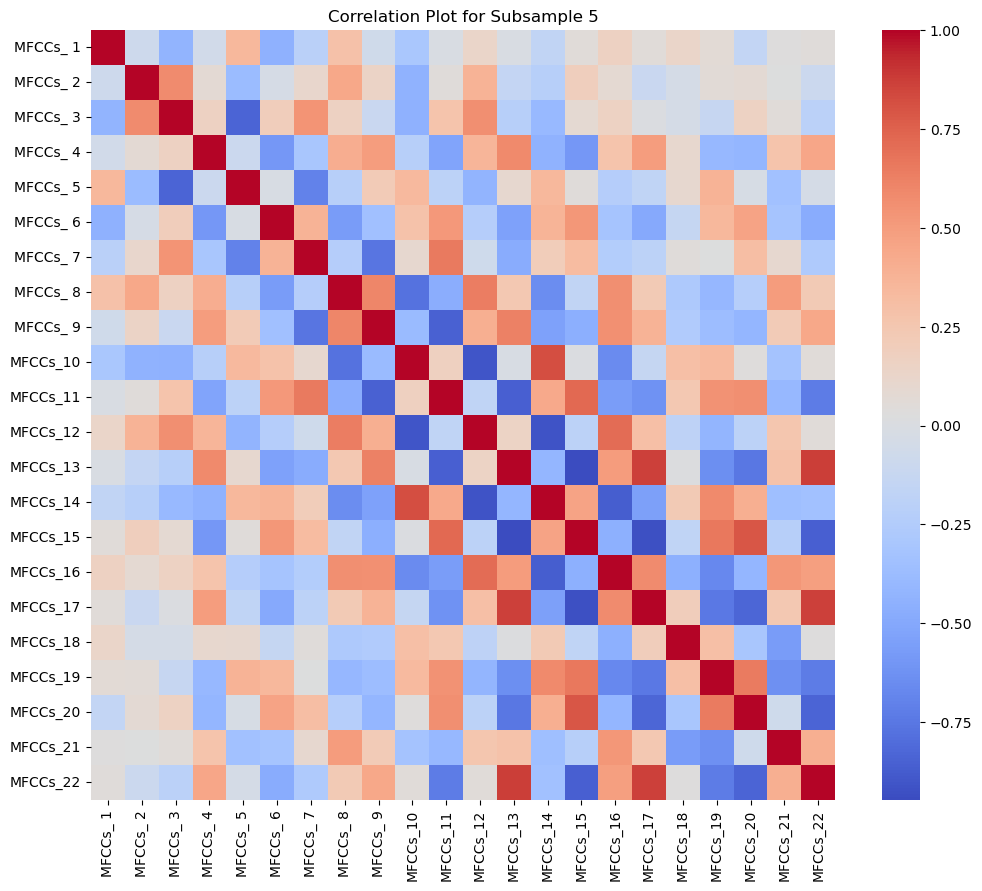

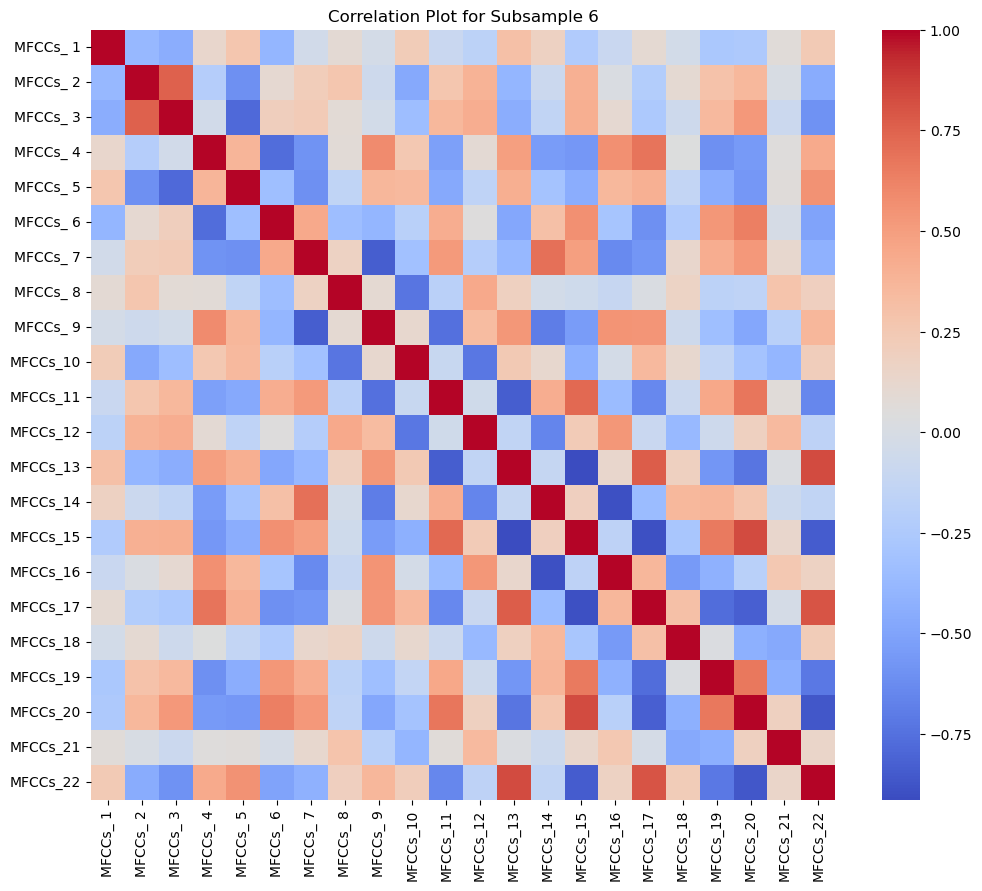

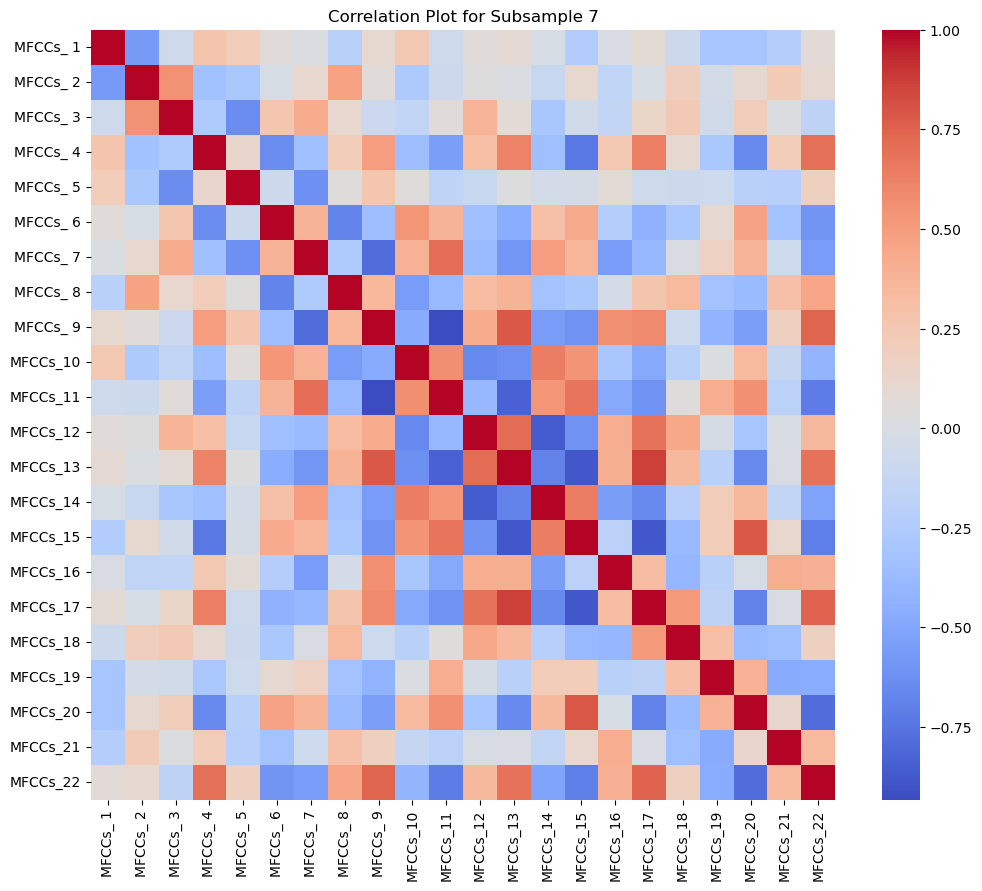

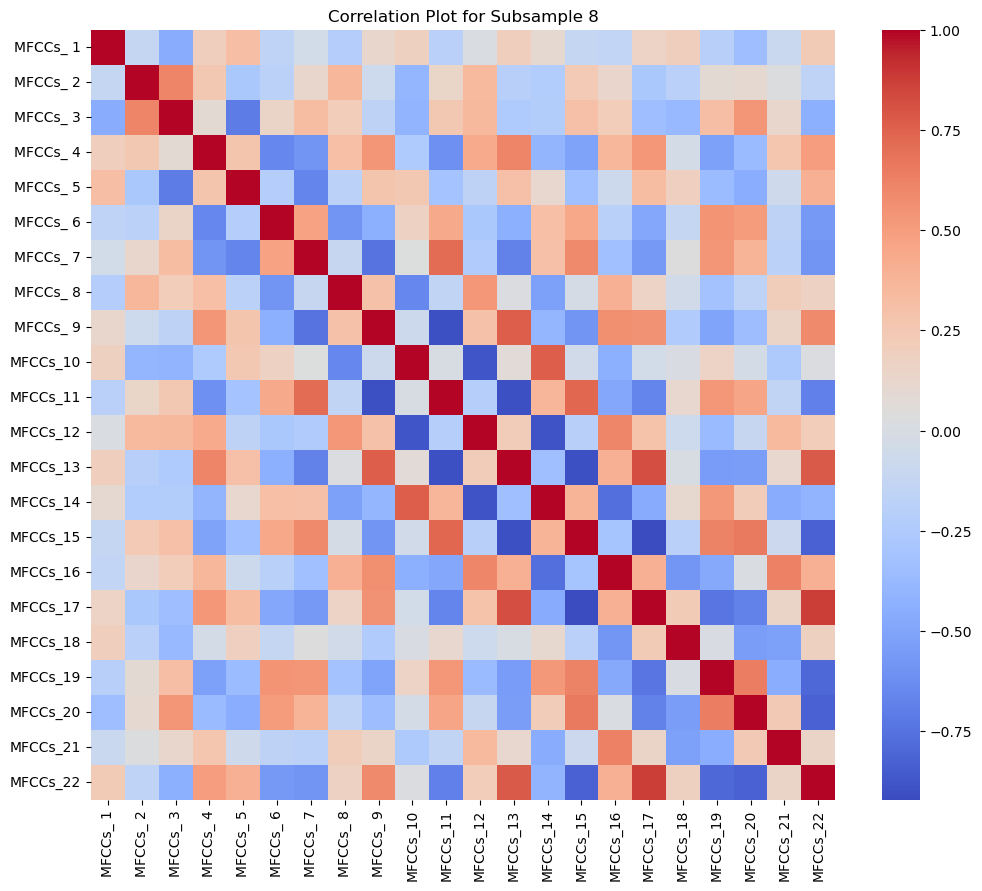

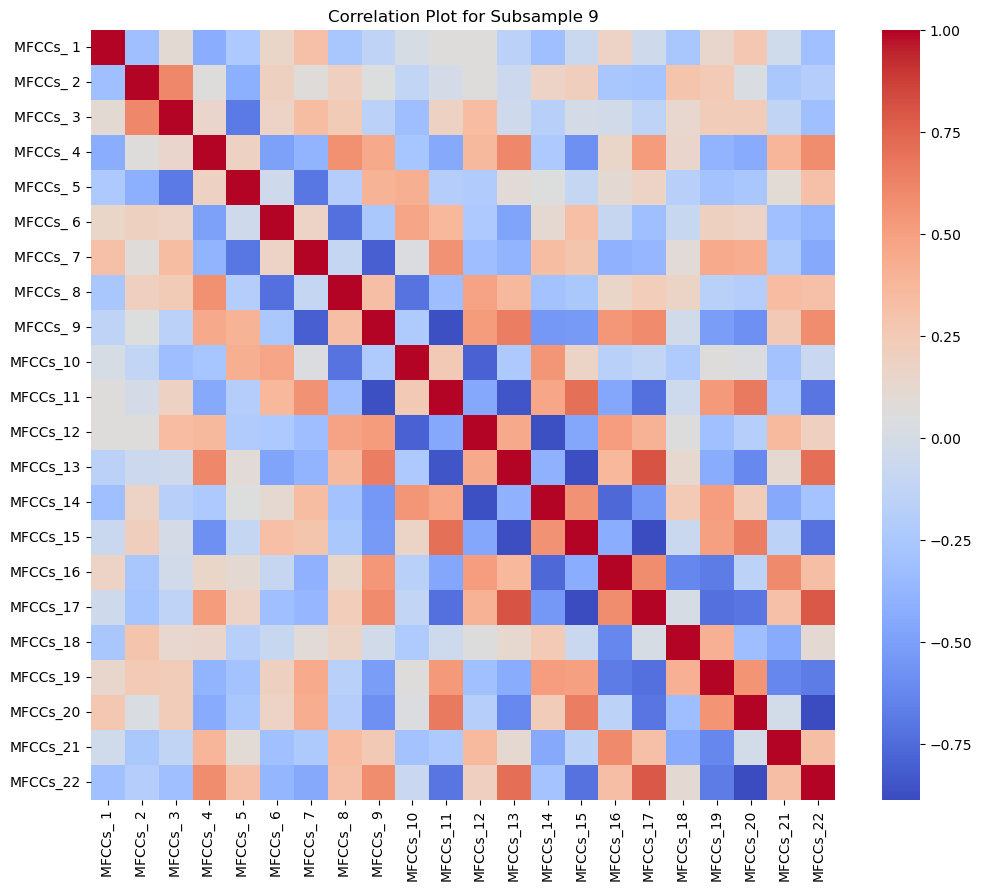

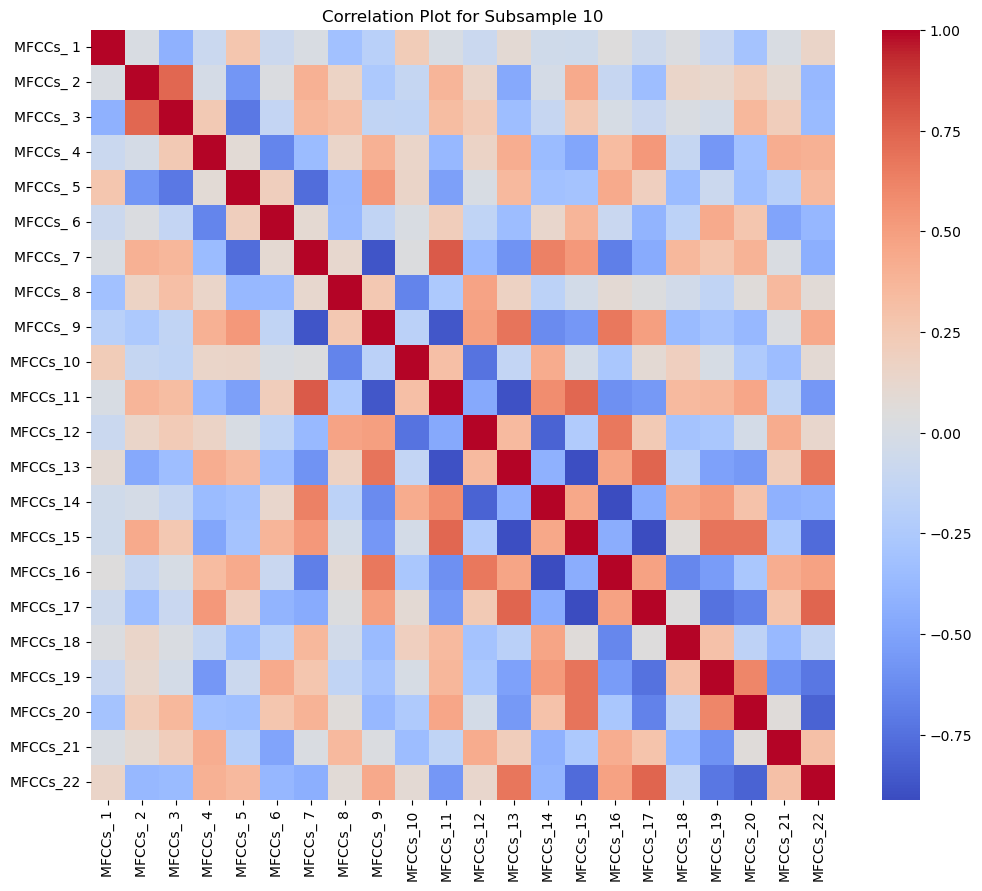

In [8]:
# Define the number of subsamples and the size of each subsample
num_subsamples = 10
subsample_size = 50

# Ensure reproducibility
np.random.seed(42)

# Select only MFCC columns
mfcc_columns = [col for col in data.columns if 'MFCCs_' in col]

# Function to create a correlation plot for a subsample
def create_correlation_plot(subsample, subsample_index):
    # Calculate correlation matrix
    corr = subsample.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=False, cmap='coolwarm', cbar=True)
    plt.title(f'Correlation Plot for Subsample {subsample_index + 1}')
    plt.show()

# Create and plot correlations for 10 subsamples
for i in range(num_subsamples):
    # Randomly sample without replacement
    subsample = data[mfcc_columns].sample(n=subsample_size, replace=False)
    
    # Create correlation plot for the subsample
    create_correlation_plot(subsample, i)

# Check Target Variable for Imbalance

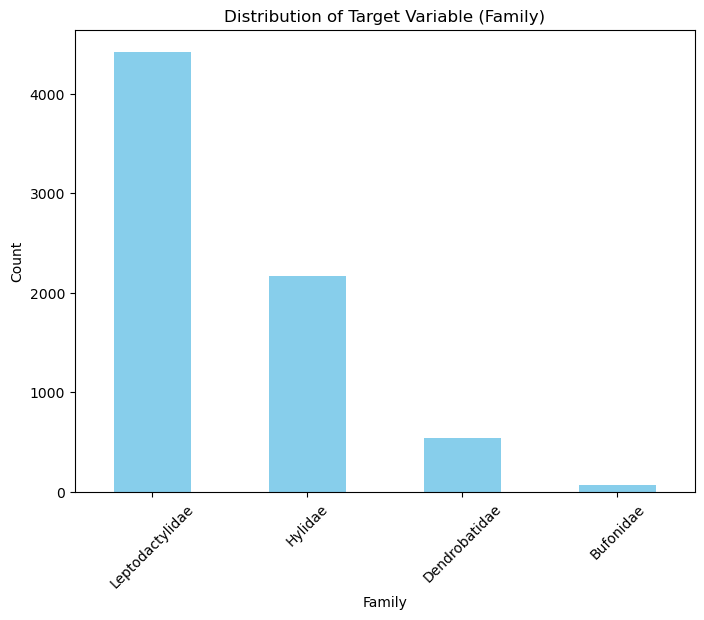

In [10]:
# Plotting
plt.figure(figsize=(8, 6))
data['Family'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable (Family)')
plt.xlabel('Family')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Print the actual numbers for each family
family_counts = data['Family'].value_counts()
print("Distribution of Target Variable (Family):")
print(family_counts)


Distribution of Target Variable (Family):
Family
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: count, dtype: int64


# Subsample and Create Pairplot for the Feature-Target Relation